<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# Week 6 Module 4 (Statistics for Data Science with Python)

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

## Task 3: Load in the Dataset in your Jupyter Notebook

In [26]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [27]:
#boston_df.head()

In [28]:
#boston_df.tail()

## Task 4: Generate Descriptive Statistics and Visualizations

### ***For the "Median value of owner-occupied homes" provide a boxplot***

In [29]:
#MEDV - Median value of owner-occupied homes in $1000's

medvdata=boston_df['MEDV']
#print( medvdata.min(), medvdata.max(), round(medvdata.mean(),1) )

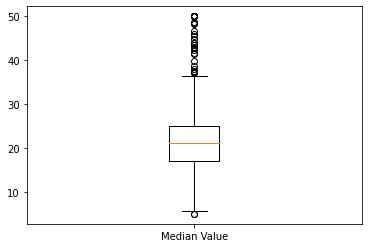

In [30]:
fig, ax = plt.subplots()
columns = [medvdata]
ax.boxplot(columns)
plt.xticks([1], ["Median Value"])
plt.show()

### ***Provide a bar plot for the Charles river variable CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)***

In [31]:
crdata=boston_df['CHAS']
#crdata.value_counts()

<AxesSubplot:title={'center':'Homes Bound by Charles River'}>

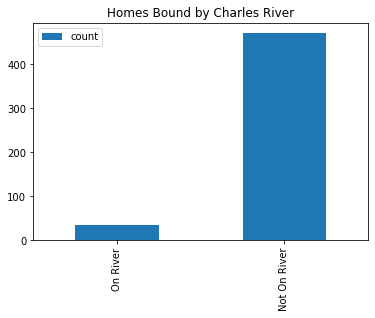

In [32]:
chaslistcnt = []
chaslistcnt.append(len( boston_df.query("CHAS==1")['CHAS'] ))
chaslistcnt.append(len( boston_df.query("CHAS==0")['CHAS'] ))

plotdata = pd.DataFrame(
    {"count": chaslistcnt },
    index=["On River", "Not On River"])
plotdata.plot(kind="bar", title="Homes Bound by Charles River")

### ***Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)***

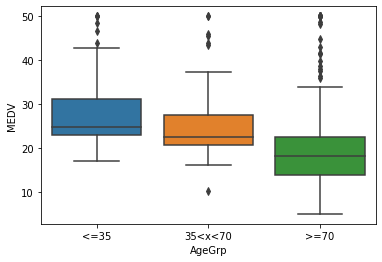

In [33]:
#boston_df[boston_df['AGE'] <= 35].loc[:,['AGE','MEDV']]
#boston_df.query('AGE > 35 & AGE < 70').loc[:,['AGE','MEDV']]
#boston_df[boston_df['AGE'] >= 70].loc[:,['AGE','MEDV']]

data1 = pd.DataFrame( boston_df[boston_df['AGE'] <= 35].loc[:,['MEDV']]  ).assign(AgeGrp='<=35')
data2 = pd.DataFrame( boston_df.query('AGE > 35 & AGE < 70').loc[:,['MEDV']]  ).assign(AgeGrp='35<x<70')
data3 = pd.DataFrame( boston_df[boston_df['AGE'] >= 70].loc[:,['MEDV']]  ).assign(AgeGrp='>=70')

#print(data1)
#print(data2)
#print(data3)
ax = sns.boxplot( x="AgeGrp", y="MEDV", data=pd.concat([data1, data2, data3]) )

### ***Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?***

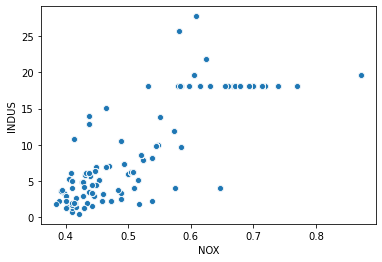

In [34]:
#NOX - nitric oxides concentration (parts per 10 million)
#INDUS - proportion of non-retail business acres per town

ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

#### NOX and INDUS seem to have a linear relationship until INDUS reaches roughly 18 acres, at which point NOX largely increases without corresponding increases in acreage.

### ***Create a histogram for the pupil to teacher ratio variable***

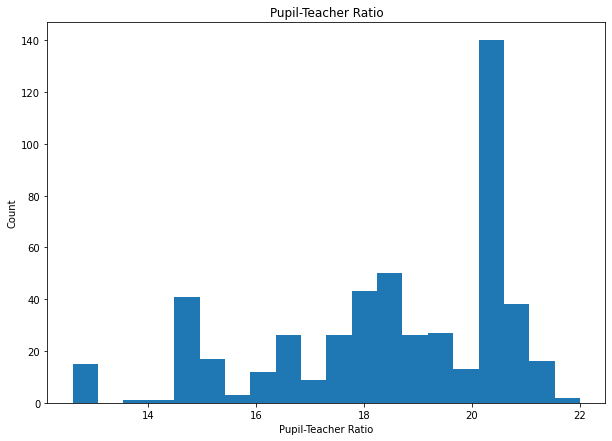

In [35]:
#PTRATIO - pupil-teacher ratio by town

fig, ax = plt.subplots(figsize =(10, 7))
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Count")
plt.title('Pupil-Teacher Ratio')

ax.hist(boston_df['PTRATIO'], bins = 20)
plt.show()

## Task 5: Use the appropriate tests to answer the questions provided.

1. State your hypothesis.
2. Use α = 0.05
3. Perform the test Statistics.
4. State the conclusion from the test.

### ***Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)***

***𝐻_0:µ_1=µ_2***  ("there is no difference in median home values whether bounded by Charles River")<br />
***𝐻_1:µ_1≠µ_2***  ("there is a difference in median home values whether bounded by Charles River")

In [36]:
#scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
#                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

***Conclusion***: Since the p-value is less than alpha value 0.05, we reject the null hypothesis, as there is enough proof that there is a statistical difference in median home values based on whether the home is on the Charles River.

### ***Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)***

***𝐻_0:µ_1=µ_2=µ_3***  (the three population means are equal)<br />
***𝐻_1:*** At least one of the means differ

In [37]:
d1 = boston_df[boston_df['AGE'] <= 35].loc[:,['MEDV']]
d2 = boston_df.query('AGE > 35 & AGE < 70').loc[:,['MEDV']]
d3 = boston_df[boston_df['AGE'] >= 70].loc[:,['MEDV']]

#print(d1)
#print(d1['MEDV'].mean(), d2['MEDV'].mean(), d3['MEDV'].mean())
#scipy.stats.levene(d1['MEDV'], d2['MEDV'], d3['MEDV'], center='mean')
f_statistic, p_value = scipy.stats.f_oneway(d1, d2, d3)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: [36.40764999], P-Value: [1.7105011e-15]


***Conclusion***: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

### ***Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)***

***𝐻_0:***  Nitric oxide concentrations is not correlated with non-retail business acres<br />
***𝐻_1:***  Nitric oxide concentrations is correlated with non-retail business acres

In [38]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209149, 7.913361061240043e-98)

***Conclusion:*** Since the p-value (Sig. (2-tailed) < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and non-retail business acres.

### ***What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)***

***𝐻_0:β1  = 0*** (Distance has no effect on median value)<br />
***𝐻_1:β1 is not equal to 0*** (Distance has an effect on median value)

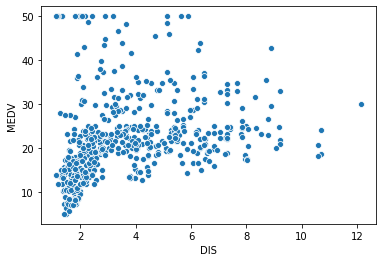

In [39]:
#print(boston_df['DIS'].min(), boston_df['DIS'].max(), boston_df['DIS'].mean())
#boston_df[['DIS','MEDV']]
ax = sns.scatterplot(x='DIS', y='MEDV', data=boston_df)

In [40]:
#DIS - weighted distances to five Boston employment centres

## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           1.21e-08
Time:                        16:57:27   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
np.sqrt(0.062) # Coefficient value

0.24899799195977465

***Conclusion***: the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference in median value based on distance to city center. 

DIS Coefficient of 1.09 implies additional distance contributes only a minor amt to median value<br />
R-Squared = 0.062 implies 0.25 correlation (weak positive correlation)